<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

# Google Store App Rating Prediction

## Problem statement

The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps are being developed every single day and only a few of them become profitable.  It is important for developers to be able to predict the success of their app and incorporate features which makes an app successful.
We can collect app data and user ratings from the app stores and use it to extract insightful information.
A machine learning model can be used to predict rating for a given app, which can be used to estimate success and scope of improvement. 


As part of this exercise we will try to predict rating for an app given features like size, number of downloads, etc.



## Data Set Information

Shape - 10841 entries and 13 columns

Attributes - 

App: Application name

Category: Category the app belongs to

Rating: Overall user rating of the app 

Reviews: Number of user reviews for the app

Size: Size of the app 

Installs: Number of user downloads/installs for the app 

Type: Paid or Free

Price: Price of the app 

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store 

Current Ver: Current version of the app available on Play Store 

Android Ver: Min required Android version 


Mount Drive (if using Colab)

In [1]:
#from google.colab import drive

In [2]:
#drive.mount('/content/gdrive')

## 1.Import Pandas and Read the Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/Shiva/Desktop/python/AllLabs/Ensemble Lab/Apps_data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

## 2. EDA and Preprocessing

### 2.1 Check info and summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Sample 5 examples from the Rating column

In [6]:
df['Rating'].sample(5)

868     3.8
841     3.5
8471    3.8
5882    NaN
5416    4.4
Name: Rating, dtype: float64

Check for NaN values

In [7]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Check summary statistics of the numerical columns in the dataframe

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367,NaN,NaN,NaN,4.19334,0.537431,1,4,4.3,4.5,19
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#  9660 unique apps, so there might be some duplicates.
# There are 34 unique categories
# Ratings have some outliers, it ranges from 1 to 19.  
# Most of them are free apps.
# Most of the apps are generalized for everyone to view


### 2.2 App Column

Let's look closely at the apps in the data 

In [10]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4118,CTRL-F - Search the real world,PRODUCTIVITY,4.4,607,37M,"50,000+",Free,0,Everyone,Productivity,"July 24, 2016",1.1,4.0.3 and up
5175,Ah! Coins,GAME,3.4,256,9.1M,"50,000+",Free,0,Everyone,Action,"December 8, 2016",1.0.0,2.3 and up
2947,Fotor Photo Editor - Photo Collage & Photo Eff...,PHOTOGRAPHY,4.5,597068,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"July 9, 2018",Varies with device,Varies with device
5612,Ringdroid,VIDEO_PLAYERS,4.4,326232,Varies with device,"50,000,000+",Free,0,Everyone,Video Players & Editors,"December 3, 2016",Varies with device,Varies with device
4595,AT&T Messages for Tablet,COMMUNICATION,3.3,3044,Varies with device,"1,000,000+",Free,0,Everyone,Communication,"April 3, 2017",Varies with device,Varies with device


Take 3 sample Apps for exploration (for eg: 'ROBLOX', 'ESPN','Nick')

In [11]:
df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
ESPN                                                 7
                                                    ..
G Theme 2 for LG V30, LG G6                          1
DS Creator 2.0                                       1
To-Do List Widget                                    1
Brightest Flashlight Free ®                          1
SAT Flashcards: Prep & Vocabulary                    1
Name: App, Length: 9660, dtype: int64

Drops other duplicate entries keeping the App with the highest reviews

In [12]:
df[df['App'].isin(['ROBLOX', 'ESPN','Nick'])].sort_values(by='Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
917,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
937,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
963,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
992,Nick,ENTERTAINMENT,4.2,123279,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
6086,Nick,FAMILY,4.2,123309,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
2226,Nick,FAMILY,4.2,123322,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


Verify that duplicates has been removed

In [13]:
df = df.sort_values(by=['App', "Reviews"])
df.drop_duplicates('App', keep='last', inplace=True)


In [14]:
df[df['App'].isin(['ROBLOX', 'ESPN','Nick'])].sort_values(by=['App', 'Reviews'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
2226,Nick,FAMILY,4.2,123322,25M,"10,000,000+",Free,0,Everyone 10+,Entertainment;Music & Video,"January 24, 2018",2.0.8,4.4 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


Check shape of the dataframe

In [15]:
df.shape

(9660, 13)

### 2.2 Category Column

Check out the App categories

In [16]:
df['Category'].value_counts()

FAMILY                 1880
GAME                    942
TOOLS                   828
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               106
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Drop the category named 1.9, unknown category and invalid category

In [17]:
df = df.drop(df[df['Category']=='1.9'].index, axis=0)

In [18]:
df['Category'].value_counts()

FAMILY                 1880
GAME                    942
TOOLS                   828
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               106
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

Visualize App category column

<AxesSubplot:>

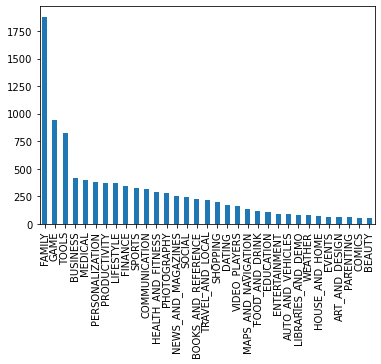

In [19]:
df['Category'].value_counts().plot(kind='bar')

### 2.3 Rating Column

Check summary statistics of Rating column

In [20]:
df['Rating'].describe()

count    8196.000000
mean        4.173084
std         0.536522
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Check the rating distribution

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

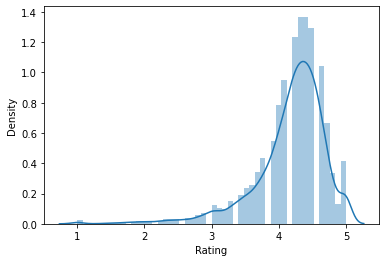

In [21]:
sns.distplot(df['Rating'])

Check the rating dataframe shape

In [22]:
df['Rating'].shape

(9659,)

Check for null values in the rating dataframe

In [23]:
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Drop the NaN values

In [24]:
df = df.sort_values(by=["Rating"])
df = df.dropna(axis=0, subset=['Rating'])

In [25]:
df.shape

(8196, 13)

In [26]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8820,DS Creator 2.0,TOOLS,1.0,2,4.4M,500+,Free,0,Everyone,Tools,"March 23, 2018",2.0.180226.1,4.0 and up
7806,CR Magazine,BUSINESS,1.0,1,7.8M,100+,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41M,500+,Free,0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2,33M,100+,Free,0,Everyone,Medical,"July 2, 2018",2.0.1,4.1 and up
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up


Convert ratings to high and low categories(>3.5 is high rest low)

In [27]:
df['Rating_cat'] = df['Rating'].apply(lambda x : "High" if x > 3.5 else "Low")

Add the categorical column to the data 

In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
8820,DS Creator 2.0,TOOLS,1.0,2,4.4M,500+,Free,0,Everyone,Tools,"March 23, 2018",2.0.180226.1,4.0 and up,Low
7806,CR Magazine,BUSINESS,1.0,1,7.8M,100+,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up,Low
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41M,500+,Free,0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up,Low
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2,33M,100+,Free,0,Everyone,Medical,"July 2, 2018",2.0.1,4.1 and up,Low
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up,Low


Check shape of the newly created dataframe

In [29]:
df.shape

(8196, 14)

Check for null columns

In [30]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
Rating_cat        0
dtype: int64

Check count of high and low ratings

In [31]:
df['Rating_cat'].value_counts()

High    7322
Low      874
Name: Rating_cat, dtype: int64

Plot the same

<AxesSubplot:>

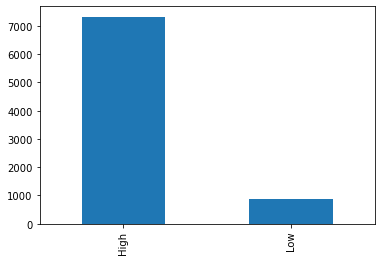

In [32]:
df['Rating_cat'].value_counts().plot(kind='bar')

### 2.4 Review Column

Convert Reviews to numeric

In [33]:
df['Reviews'].sample(5)

8935     158
2842    4410
4912      60
6196    4334
6306    4099
Name: Reviews, dtype: object

Check info

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 8820 to 9194
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   object 
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
 13  Rating_cat      8196 non-null   object 
dtypes: float64(1), object(13)
memory usage: 960.5+ KB


Convert Reviews to numeric

In [35]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors = 'coerce')

In [36]:
#To check the conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 8820 to 9194
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int64  
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   object 
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
 13  Rating_cat      8196 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 960.5+ KB


 Review distibution 

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

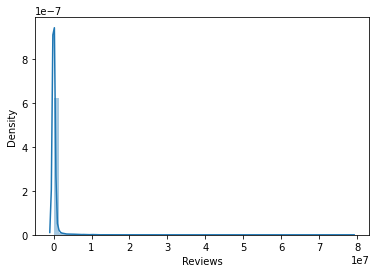

In [37]:
sns.distplot(df['Reviews'])

### 2.5 Size Column

Working on Size column

The column currently contail alphanumeric values. 

Check count

In [38]:
df['Size'].value_counts().sum()

8196

Replace M with 1 million and k with 1 thousand

In [39]:
def convert(x):
    if 'M' in x:
        return float(x.split('M')[0]) * 1000000
    elif 'k' in x:
        return float(x.split('k')[0]) * 1000
        
df['Size_num'] = df['Size'].apply(lambda x : convert(x))

Check Size values counts

In [40]:
df['Size_num'].value_counts()

14000000.0    149
12000000.0    146
11000000.0    144
13000000.0    143
15000000.0    138
             ... 
629000.0        1
920000.0        1
280000.0        1
190000.0        1
656000.0        1
Name: Size_num, Length: 412, dtype: int64

convert column to numeric, dropping non numeric values





In [41]:
df['Size_num'] = pd.to_numeric(df['Size_num'], errors = 'coerce')

Check info

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 8820 to 9194
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int64  
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   object 
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
 13  Rating_cat      8196 non-null   object 
 14  Size_num        7027 non-null   float64
dtypes: float64(2), int64(1), object(12)
memory usage: 1.0+ MB


Check for NaN values

In [43]:
df['Size_num'].isna().sum()

1169

Impute the null values in "Size" column 

In [44]:
df['Size_num'].mode()[0]

14000000.0

In [45]:
df['Size_num'].fillna(df['Size_num'].mode()[0],inplace  = True)

In [46]:
df['Size_num'].isna().sum()

0

/Users/Shiva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size_num', ylabel='Density'>

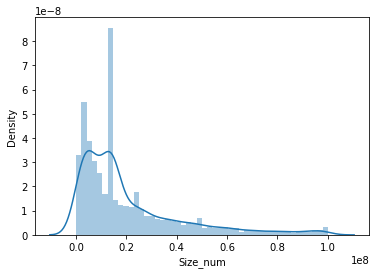

In [47]:
sns.distplot(df['Size_num'])

### 2.6 Install Column

In [48]:
df['Installs'].head(5)

8820     500+
7806     100+
10591    500+
10400    100+
5151      50+
Name: Installs, dtype: object

Check value counts

In [49]:
df['Installs'].value_counts()

1,000,000+        1416
100,000+          1095
10,000+            986
10,000,000+        934
1,000+             697
5,000,000+         608
500,000+           504
50,000+            457
5,000+             425
100+               303
50,000,000+        203
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Name: Installs, dtype: int64

Replace , and + with space

In [50]:
df['Installs'].replace(regex=True, inplace=True, to_replace=r'[+,]', value=r'')


Convert to numeric type

In [51]:
df['Installs'] = df['Installs'].astype(float)

Check value counts

In [52]:
df['Installs'].value_counts()

1.000000e+06    1416
1.000000e+05    1095
1.000000e+04     986
1.000000e+07     934
1.000000e+03     697
5.000000e+06     608
5.000000e+05     504
5.000000e+04     457
5.000000e+03     425
1.000000e+02     303
5.000000e+07     203
5.000000e+02     199
1.000000e+08     188
1.000000e+01      69
5.000000e+01      56
5.000000e+08      24
1.000000e+09      20
5.000000e+00       9
1.000000e+00       3
Name: Installs, dtype: int64

Check info

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 8820 to 9194
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int64  
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   float64
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
 13  Rating_cat      8196 non-null   object 
 14  Size_num        8196 non-null   float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.0+ MB


Get the bin levels

In [54]:
binLevels = df['Installs'].sort_values().unique()
binLevels

array([1.e+00, 5.e+00, 1.e+01, 5.e+01, 1.e+02, 5.e+02, 1.e+03, 5.e+03,
       1.e+04, 5.e+04, 1.e+05, 5.e+05, 1.e+06, 5.e+06, 1.e+07, 5.e+07,
       1.e+08, 5.e+08, 1.e+09])

Create bins for Installs

In [55]:
df['Install_cat'] = df['Installs'].replace(binLevels , range(0,len(binLevels)))

In [56]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat,Size_num,Install_cat
8820,DS Creator 2.0,TOOLS,1.0,2,4.4M,500.0,Free,0,Everyone,Tools,"March 23, 2018",2.0.180226.1,4.0 and up,Low,4400000.0,5.0
7806,CR Magazine,BUSINESS,1.0,1,7.8M,100.0,Free,0,Everyone,Business,"July 23, 2014",2.4.2,2.3.3 and up,Low,7800000.0,4.0
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41M,500.0,Free,0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up,Low,41000000.0,5.0
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2,33M,100.0,Free,0,Everyone,Medical,"July 2, 2018",2.0.1,4.1 and up,Low,33000000.0,4.0
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50.0,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up,Low,28000000.0,3.0


### 2.7 Type

Get value counts

In [57]:
df['Type'].value_counts()

Free    7592
Paid     604
Name: Type, dtype: int64

Plot pie chart for percentage of free vs paid app in store

<AxesSubplot:ylabel='Type'>

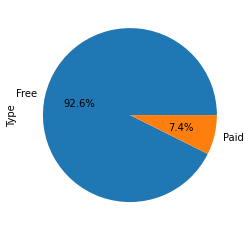

In [58]:
df['Type'].value_counts().plot(kind = 'pie', autopct="%1.1f%%")

Check the columns and info

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 8820 to 9194
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int64  
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   float64
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
 13  Rating_cat      8196 non-null   object 
 14  Size_num        8196 non-null   float64
 15  Install_cat     8196 non-null   float64
dtypes: float64(4), int64(1), object(11)
memory usage: 1.1+ MB


### 2.8 Price

Check value counts

In [60]:
df['Price'].value_counts()

0         7592
$2.99      109
$0.99      104
$4.99       68
$1.99       59
          ... 
$39.99       1
$33.99       1
$1.59        1
$3.04        1
$4.84        1
Name: Price, Length: 73, dtype: int64

Replace $ with space

In [61]:
df['Price'] = df['Price'].map(lambda x: x.lstrip('$'))

convert column to numeric, dropping non numeric values

In [62]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

Get summary statistics

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 8820 to 9194
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int64  
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   float64
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   float64
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
 13  Rating_cat      8196 non-null   object 
 14  Size_num        8196 non-null   float64
 15  Install_cat     8196 non-null   float64
dtypes: float64(5), int64(1), object(10)
memory usage: 1.1+ MB


In [64]:
df['Price'].describe()

count    8196.000000
mean        1.037884
std        16.857882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

## Data Preparation

Check info

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 8820 to 9194
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   int64  
 4   Size            8196 non-null   object 
 5   Installs        8196 non-null   float64
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   float64
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
 10  Last Updated    8196 non-null   object 
 11  Current Ver     8192 non-null   object 
 12  Android Ver     8194 non-null   object 
 13  Rating_cat      8196 non-null   object 
 14  Size_num        8196 non-null   float64
 15  Install_cat     8196 non-null   float64
dtypes: float64(5), int64(1), object(10)
memory usage: 1.1+ MB


Drop 'App','Content Rating','Genres','Last Updated', 'Current Ver','Android Ver' columns

In [66]:
df = df.drop(['App','Content Rating','Genres','Last Updated', 'Current Ver','Android Ver', 'Rating', 'Size', 'Installs'], axis =1)

In [67]:
df.head(5)

,Category,Reviews,Type,Price,Rating_cat,Size_num,Install_cat
8820,TOOLS,2,Free,0.0,Low,4400000.0,5.0
7806,BUSINESS,1,Free,0.0,Low,7800000.0,4.0
10591,TOOLS,3,Free,0.0,Low,41000000.0,5.0
10400,MEDICAL,2,Free,0.0,Low,33000000.0,4.0
5151,MEDICAL,1,Free,0.0,Low,28000000.0,3.0


One hot encode 'Rating_cat','Type','Category' columns

In [68]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [69]:
df['Category'].unique()

array(['TOOLS', 'BUSINESS', 'MEDICAL', 'COMMUNICATION', 'PRODUCTIVITY',
       'FAMILY', 'FINANCE', 'GAME', 'DATING', 'HEALTH_AND_FITNESS',
       'LIFESTYLE', 'SPORTS', 'SHOPPING', 'FOOD_AND_DRINK',
       'NEWS_AND_MAGAZINES', 'VIDEO_PLAYERS', 'MAPS_AND_NAVIGATION',
       'SOCIAL', 'PARENTING', 'PHOTOGRAPHY', 'AUTO_AND_VEHICLES',
       'TRAVEL_AND_LOCAL', 'PERSONALIZATION', 'BOOKS_AND_REFERENCE',
       'HOUSE_AND_HOME', 'COMICS', 'EVENTS', 'ENTERTAINMENT', 'BEAUTY',
       'LIBRARIES_AND_DEMO', 'ART_AND_DESIGN', 'WEATHER', 'EDUCATION'],
      dtype=object)

In [70]:
df['Rating_cat'].unique()

array(['Low', 'High'], dtype=object)

In [71]:
df = pd.get_dummies(df, columns = ['Category','Rating_cat', 'Type'],drop_first=True)

In [72]:
df.head()

,Reviews,Price,Size_num,Install_cat,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Rating_cat_Low,Type_Paid
8820,2,0.0,4400000.0,5.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7806,1,0.0,7800000.0,4.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
10591,3,0.0,41000000.0,5.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10400,2,0.0,33000000.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5151,1,0.0,28000000.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
df.shape

(8196, 38)

Drop 'Rating_cat_Low','Rating' columns for feature and make 'Rating_cat_Low' as target

In [74]:
X = df.drop('Rating_cat_Low', axis = 1)

y = df['Rating_cat_Low']

Split train and test samples(Split size = 0.3 and random_state = 42)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [76]:
X_train.shape, y_train.shape

((5737, 37), (5737,))

In [77]:
X_test.shape, y_test.shape

((2459, 37), (2459,))

In [78]:
#Scaling of the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [79]:
X_train_std

array([[-0.12953606, -0.06395469, -0.62954953, ..., -0.13785982,
        -0.09470691, -0.28429105],
       [-0.13684875, -0.06395469, -0.75259048, ..., -0.13785982,
        -0.09470691, -0.28429105],
       [-0.13673603, -0.06395469, -0.75732283, ..., -0.13785982,
        -0.09470691, -0.28429105],
       ...,
       [ 0.62860716, -0.06395469, -0.39766466, ..., -0.13785982,
        -0.09470691, -0.28429105],
       [-0.13710988, -0.06395469, -0.6153525 , ..., -0.13785982,
        -0.09470691, -0.28429105],
       [-0.13239373,  0.21473412, -0.5727614 , ..., -0.13785982,
        -0.09470691,  3.51752191]])

## Model Building

### 4.1 Classification

Write a function to fit and print the model predictions, input parameters would be model, X_train, X_test, y_train and y_test

In [80]:
from sklearn.metrics import confusion_matrix , classification_report

def fitPrint(model , x_train, y_train , x_test, y_test):
    
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    
    print("Training Accuracy : ", model.score(x_train, y_train))
    print("Test Accuracy : ", model.score(x_test, y_test))
    
    print("#" * 50)
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))

## Results

### 5.1 Logistic Regression

Pass logistic regression model into the function 

In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

fitPrint(lr,X_train_std,y_train, X_test_std,y_test)

Training Accuracy :  0.896810179536343
Test Accuracy :  0.8857259048393656
##################################################
[[2177    0]
 [ 281    1]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2177
           1       1.00      0.00      0.01       282

    accuracy                           0.89      2459
   macro avg       0.94      0.50      0.47      2459
weighted avg       0.90      0.89      0.83      2459



### 5.2 KNN
Pass KNN classifier into the function"

In [82]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(2,9,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    
    fitPrint(knn,X_train_std,y_train, X_test_std,y_test)

Training Accuracy :  0.9199930277148335
Test Accuracy :  0.8808458723058153
##################################################
[[2148   29]
 [ 264   18]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2177
           1       0.38      0.06      0.11       282

    accuracy                           0.88      2459
   macro avg       0.64      0.53      0.52      2459
weighted avg       0.83      0.88      0.84      2459

Training Accuracy :  0.9069199930277149
Test Accuracy :  0.8824725498169987
##################################################
[[2155   22]
 [ 267   15]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2177
           1       0.41      0.05      0.09       282

    accuracy                           0.88      2459
   macro avg       0.65      0.52      0.52      2459
weighted avg       0.83      0.88      0.84      2459

Training Accuracy :  0.902213700540352

### 5.3 Random Forest

Pass Random forest model into the function

In [83]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight = 'balanced' , n_estimators = 100)

fitPrint(rfc,X_train_std,y_train, X_test_std,y_test)

Training Accuracy :  1.0
Test Accuracy :  0.8828792191947946
##################################################
[[2142   35]
 [ 253   29]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      2177
           1       0.45      0.10      0.17       282

    accuracy                           0.88      2459
   macro avg       0.67      0.54      0.55      2459
weighted avg       0.84      0.88      0.85      2459



### 5.4 Gradient Boosting

Pass Gradient boosting model into the function

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 200)

fitPrint(gbc,X_train_std,y_train, X_test_std,y_test)

Training Accuracy :  0.9104061356109465
Test Accuracy :  0.8796258641724278
##################################################
[[2153   24]
 [ 272   10]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2177
           1       0.29      0.04      0.06       282

    accuracy                           0.88      2459
   macro avg       0.59      0.51      0.50      2459
weighted avg       0.82      0.88      0.84      2459



Check feature importance

In [85]:
feature_imp = pd.DataFrame({"Features": X_train.columns, "Importance": gbc.feature_importances_})
feature_imp.sort_values(by = 'Importance', ascending = False)


,Features,Importance
0,Reviews,0.462281
2,Size_num,0.182056
3,Install_cat,0.097429
1,Price,0.044286
34,Category_VIDEO_PLAYERS,0.025031
18,Category_HEALTH_AND_FITNESS,0.021560
10,Category_DATING,0.019633
32,Category_TOOLS,0.017718
21,Category_LIFESTYLE,0.014314
14,Category_FAMILY,0.013334


### 5.5 AdaBoosting

Pass AdaBoosting model into the function

In [86]:
from sklearn.ensemble import AdaBoostClassifier

adc = GradientBoostingClassifier(n_estimators = 100)

fitPrint(adc,X_train_std,y_train, X_test_std,y_test)

Training Accuracy :  0.9043053860902911
Test Accuracy :  0.882065880439203
##################################################
[[2164   13]
 [ 277    5]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2177
           1       0.28      0.02      0.03       282

    accuracy                           0.88      2459
   macro avg       0.58      0.51      0.49      2459
weighted avg       0.82      0.88      0.83      2459



### 5.6 Stacking

Pass stacking model into the function

In [87]:
from sklearn.ensemble import StackingClassifier

estimators = [('lr',lr ), ('rfc',rfc ), ('gbc',gbc ), ('adc',adc )]

clf = StackingClassifier(estimators = estimators, final_estimator = rfc)

fitPrint(clf,X_train_std,y_train, X_test_std,y_test)

Training Accuracy :  0.9011678577653826
Test Accuracy :  0.8808458723058153
##################################################
[[2160   17]
 [ 276    6]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2177
           1       0.26      0.02      0.04       282

    accuracy                           0.88      2459
   macro avg       0.57      0.51      0.49      2459
weighted avg       0.81      0.88      0.83      2459



## Conclusion

Infer your predictions and write down your observations

In [88]:
## RFC with balance class weight is having best score
## can improve result with hyper parameter tuning
## test accuracy =
## F1 score = 50%

Reviews and size are the most importance features for this classification


SyntaxError: invalid syntax (<ipython-input-88-32b9e32f68dd>, line 6)